# Gather

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import os
import config
from datetime import datetime

## WeRateDogs data

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')

## tweet image predictions

In [3]:
if not os.path.exists('image-predictions.csv'):
    r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)
        
images = pd.read_csv('image-predictions.tsv', sep='\t')

## retweet and favourites counts

In [4]:
import tweepy

auth = tweepy.OAuthHandler(config.api_key, config.api_secret)
auth.set_access_token(config.access_token, config.access_secret)

api = tweepy.API(auth)

In [5]:
if not os.path.exists('tweet_json.txt'):
    start_time = datetime.now()
    deleted_tweets = []
    f = open('tweet_json.txt', 'w')
    for tweet_id in list(tweets.tweet_id):
        try:
            tweet_info = api.get_status(tweet_id, tweet_mode='extended')
            f.write(json.dumps(tweet_info._json))
            f.write('\n')
        except:
            deleted_tweets.append(tweet_id)
    f.close()
    end_time = datetime.now()
    time_taken = (end_time - start_time).total_seconds()
    print('{} tweets are deleted.'.format(len(deleted_tweets)))
    print('Time taken: {} minutes'.format(round(time_taken/60, 2)))
    
ret_fav_count_list = []
f = open('tweet_json.txt', 'r')
for line in f:
    tweet_info_dict = json.loads(line)
    tweet_id = tweet_info_dict.get('id')
    retweet_count = tweet_info_dict.get('retweet_count')
    favorite_count = tweet_info_dict.get('favorite_count')
    ret_fav_count_list.append({'tweet_id':tweet_id,
                                         'retweet_count':retweet_count,
                                         'favourite_count':favorite_count})
f.close()

ret_fav_count = pd.DataFrame(ret_fav_count_list, columns=['tweet_id', 'retweet_count', 'favourite_count'])  

# Assess

## tweets table

In [6]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
tweets.tweet_id.duplicated().sum()

0

In [9]:
tweets[tweets['in_reply_to_status_id'].notnull()].in_reply_to_user_id

30      2.281182e+09
55      4.738443e+07
64      3.105441e+09
113     1.648776e+07
148     7.759620e+07
            ...     
2038    4.196984e+09
2149    4.196984e+09
2169    4.196984e+09
2189    2.143566e+07
2298    4.196984e+09
Name: in_reply_to_user_id, Length: 78, dtype: float64

In [10]:
tweets.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [11]:
len(tweets[tweets.doggo == 'None'][tweets.pupper == 'None'][tweets.puppo == 'None'][tweets.floofer == 'None'])

C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1976

In [12]:
tweets[tweets.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [13]:
tweets[tweets.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [14]:
tweets[tweets.in_reply_to_status_id.notnull()].text[55]

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [15]:
tweets[tweets.in_reply_to_status_id.notnull()].in_reply_to_status_id[30]

8.862663570751283e+17

In [16]:
tweets.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
        ... 
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [17]:
tweets[tweets.rating_numerator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [18]:
tweets.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Brownie       1
Simba         1
Dunkin        1
Sage          1
Ralphson      1
Name: name, Length: 957, dtype: int64

In [19]:
tweets[tweets.name=='a'].text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

## images table

In [20]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
images[images.p1_dog == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


## retweet and favourite counts

In [23]:
ret_fav_count

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7433,35246
1,892177421306343426,5527,30511
2,891815181378084864,3647,22942
3,891689557279858688,7610,38524
4,891327558926688256,8192,36800
...,...,...,...
1167,666049248165822465,39,94
1168,666044226329800704,123,262
1169,666033412701032449,39,108
1170,666029285002620928,41,118


In [24]:
ret_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         1172 non-null   int64
 1   retweet_count    1172 non-null   int64
 2   favourite_count  1172 non-null   int64
dtypes: int64(3)
memory usage: 27.6 KB


In [25]:
(ret_fav_count.retweet_count > ret_fav_count.favourite_count).sum()

153

In [26]:
ret_fav_count[ret_fav_count.retweet_count > ret_fav_count.favourite_count].sample(10)

,tweet_id,retweet_count,favourite_count
731,779124354206535695,17940,0
31,886054160059072513,96,0
418,820494788566847489,553,0
437,818588835076603904,6006,0
318,832769181346996225,38,0
597,796563435802726400,7164,0
288,836648853927522308,534,0
409,821421320206483457,5447,0
563,800443802682937345,4280,0
434,818646164899774465,20595,0


## Quality

tweets table
- in_reply_to_status_user_id and in_reply_to_user_id columns are float, and have e+17 and a dot.
- timestamp column is object
- retweets act as duplicates
- numerator of index 55 is not 17, but 13 instead
- denominator does not have 10 as the only value, rating score should be one column
- rating score has outliers (some of them because of decimals in the numerators)
- expanded_urls column has repeated values if the tweet has more than one photo
- name column has 'a' and 'the' values that should be replaced with 'None'

images table
- 3 falses in the p#_dog value
- 3 breeds for the same picture

ret_fav_count table
- 139 tweets have 0 value in the favourite count, that's because they are related to retweets

## Tidiness

tweets table
- doggo, floofer, pupper, and puppo are 4 attributes that should be combined to be just one attribute name 'stage'

images table
- one breed column should be created
- breed column should belong to tweets table

ret_fav_count table
- it should belong to the tweets table

# Clean

## Quality

### tweets table

In [27]:
tweets_clean = tweets.copy()

#### Define

- change in_reply_to_status_user_id and in_reply_to_user_id columns from float to string
- remove "e+17" and the dot
- replace NaN values with "N/A"

#### Code

In [28]:
tweets_clean['in_reply_to_status_id'] = tweets_clean['in_reply_to_status_id'].astype(str)
tweets_clean['in_reply_to_status_id'] = tweets_clean['in_reply_to_status_id'].apply(lambda x: x.replace('e+17', '')\
                                                                                               .replace('.', '')\
                                                                                               .replace('nan', 'N/A'))

In [29]:
tweets_clean['in_reply_to_user_id'] = tweets_clean['in_reply_to_user_id'].astype(str)
tweets_clean['in_reply_to_user_id'] = tweets_clean['in_reply_to_user_id'].apply(lambda x: x.replace('e+17', '')\
                                                                                               .replace('.', '')\
                                                                                               .replace('nan', 'N/A'))

#### Test

In [30]:
tweets_clean[tweets_clean.in_reply_to_status_id != 'N/A'].in_reply_to_status_id

30      8862663570751283
55      8816070373140521
64      8795538273341727
113     8707262027424932
148     8634256455687741
              ...       
2038    6715448741650022
2149    6693543826270495
2169    6678064545737605
2189    6689207171325829
2298    6670655355705508
Name: in_reply_to_status_id, Length: 78, dtype: object

In [31]:
tweets_clean[tweets_clean.in_reply_to_user_id != 'N/A'].in_reply_to_user_id

30      22811816000
55        473844300
64      31054407460
113       164877600
148       775962000
           ...     
2038    41969838350
2149    41969838350
2169    41969838350
2189      214356580
2298    41969838350
Name: in_reply_to_user_id, Length: 78, dtype: object

#### Define

- change timestamp column from object to datetime

#### Code

In [32]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

#### Test

In [33]:
tweets_clean['timestamp'].dtype.name

'datetime64[ns, UTC]'

#### Define

- remove retweets as they act as duplicates
- drop retweeted_status_user_id and retweeted_status_id columns

#### Code

In [34]:
idx_to_drop = tweets_clean[tweets_clean['retweeted_status_id'].notnull()].index
tweets_clean.drop(index=idx_to_drop, inplace=True)

tweets_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                  inplace=True)

#### Test

In [35]:
tweets_clean[tweets_clean.index.isin(idx_to_drop)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

- change numerator of index 55 is not 17, but 13 instead

#### Code

In [36]:
tweets_clean.loc[55].rating_numerator

17

In [37]:
tweets_clean.loc[55, 'rating_numerator'] = 13

#### Test

In [38]:
tweets_clean.loc[55].rating_numerator

13

#### Define

- create a rating_score column by dividing rating_numerator by rating_denominator
- drop rating_numerator and rating_denominator columns

#### Code

In [39]:
tweets_clean['rating_score'] = tweets_clean['rating_numerator'] / tweets['rating_denominator']
tweets_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### Test

In [40]:
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating_score'],
      dtype='object')

In [41]:
tweets_clean.rating_score.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating_score, dtype: float64

#### Define

- remove outliers in rating_score column (some of them had decimals in the numerators)
    1. since WeRateDogs rate dogs mostly 10/10, then values less than 1 will be substituted as 1
    2. remove values more than 1.5

#### Code

In [42]:
tweets_clean['rating_score'] = tweets_clean['rating_score'].apply(lambda x: 1 if x < 1 else x)

In [43]:
idx_to_drop = tweets_clean[tweets_clean['rating_score'] > 1.5].index
tweets_clean.drop(index=idx_to_drop, inplace=True)

#### Test

In [44]:
tweets_clean[tweets_clean['rating_score'] < 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score


In [45]:
tweets_clean[tweets_clean['rating_score'] > 1.5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score


#### Define

- make the expanded_urls with only one value per tweet

#### Code

In [46]:
tweets_clean['expanded_urls'] = tweets_clean['expanded_urls'].dropna().apply(lambda x: x[0] if len(x.split(',')) > 1 else x)

#### Test

In [47]:
tweets_clean.expanded_urls.values

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

#### Define

- replace 'a' or 'the' with 'None' in name column

#### Code

In [48]:
tweets_clean['name'] = tweets_clean['name'].apply(lambda x: 'None' if ((x == 'a') or (x == 'the')) else x)

#### Test

In [50]:
tweets_clean[tweets_clean['name']=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score


In [52]:
tweets_clean[tweets_clean['name']=='the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score


### images table

In [53]:
images_clean = images.copy()

#### Define

- remove rows with 3 falses in the p#_dog value

#### Code

In [54]:
idx_to_drop = images_clean[images_clean.p1_dog == False][images_clean.p2_dog == False][images_clean.p3_dog == False].index
images_clean.drop(index=idx_to_drop, inplace=True)

C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### Test

In [55]:
images_clean[images_clean.p1_dog == False][images_clean.p2_dog == False][images_clean.p3_dog == False]

C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### retweet and favourite counts table

#### Define

- remove records with favourite_count equal to zero

#### Code

In [56]:
idx_to_drop = ret_fav_count[ret_fav_count['favourite_count']==0].index
ret_fav_count.drop(index=idx_to_drop, inplace=True)

#### Test

In [57]:
ret_fav_count[ret_fav_count['favourite_count']==0]

,tweet_id,retweet_count,favourite_count


## Tidiness

### tweets table

#### Define

create 'stage' column for all 4 columns; doggo, floofer, pupper, and puppo
1. specify columns that will not change
2. use melt function with variable name 'dog' and value 'stage'
3. drop dog column
4. drop duplicates

#### Code

In [58]:
cols = list(tweets_clean.columns)
cols_remove = ['doggo', 'floofer', 'pupper', 'puppo']
for col in cols_remove:
    cols.remove(col)
    
tweets_clean = pd.melt(tweets_clean, id_vars=cols, var_name='dog', value_name='stage')
tweets_clean.drop(columns='dog', inplace=True)
tweets_clean.drop_duplicates(inplace=True)

#### Test

In [59]:
tweets_clean.stage.sample(20)

2119      None
204      doggo
814       None
1520      None
799       None
195       None
570       None
1212      None
1034      None
6098    pupper
1622      None
987       None
1655      None
452       None
948       None
1649      None
894       None
19        None
1346      None
1519      None
Name: stage, dtype: object

### images table

#### Define

- select breed value depending on boolean values in p#_dog

#### Code

In [60]:
breed_p1 = images_clean[images_clean['p1_dog']==True][['tweet_id', 'p1']]
breed_p1.rename(columns={'p1':'breed'}, inplace=True)

breed_p2 = images_clean[images_clean['p1_dog']==False][images_clean['p2_dog']==True][['tweet_id', 'p2']]
breed_p2.rename(columns={'p2':'breed'}, inplace=True)

breed_p3 = images_clean[images_clean['p1_dog']==False][images_clean['p2_dog']==False][images_clean['p3_dog']==True][['tweet_id', 'p3']]
breed_p3.rename(columns={'p3':'breed'}, inplace=True)

breed = pd.concat([breed_p1, breed_p2, breed_p3])

C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


#### Test

In [61]:
breed.head()

,tweet_id,breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


#### Define

- combine breeds column to tweets table

#### Code

In [62]:
tweets_clean = tweets_clean.merge(breed, on='tweet_id', how='left')

#### Test

In [63]:
tweets_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating_score,stage,breed
679,766008592277377025,N/A,N/A,2016-08-17 20:27:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,https://twitter.com/dog_rates/status/766008592...,Angel,1.1,None,Welsh_springer_spaniel
406,813157409116065792,N/A,N/A,2016-12-25 23:00:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Layla. It is her first Christmas. She ...,h,Layla,1.2,None,Pembroke


### ret_fav_counts table

#### Define

- combine ret_fav_counts table to tweets table

#### Code

In [64]:
tweets_clean = tweets_clean.merge(ret_fav_count, on='tweet_id', how='left')

#### Test

In [65]:
tweets_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating_score,stage,breed,retweet_count,favourite_count
0,892420643555336193,N/A,N/A,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,NaN,7433.0,35246.0
1,892177421306343426,N/A,N/A,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,Chihuahua,5527.0,30511.0


## Final Adjustments tweets table

#### Define

- convert retweet_count and favourite_count columns from float to int

#### Code

In [66]:
tweets_clean['retweet_count'] = tweets_clean['retweet_count'].astype('Int64')
tweets_clean['favourite_count'] = tweets_clean['favourite_count'].astype('Int64')

#### Test

In [67]:
tweets_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                datetime64[ns, UTC]
source                                object
text                                  object
expanded_urls                         object
name                                  object
rating_score                         float64
stage                                 object
breed                                 object
retweet_count                          Int64
favourite_count                        Int64
dtype: object

# Store

In [68]:
tweets_clean.to_csv('twitter_arhive_master.csv', index=False)

# Analysis

In [69]:
df = pd.read_csv('twitter_arhive_master.csv')
df.dtypes

tweet_id                   int64
in_reply_to_status_id    float64
in_reply_to_user_id      float64
timestamp                 object
source                    object
text                      object
expanded_urls             object
name                      object
rating_score             float64
stage                     object
breed                     object
retweet_count            float64
favourite_count          float64
dtype: object

When data is being stored and read again, columns types change. Add a function that takes care of the types of the columns.

In [70]:
def change_types(df):
    df.timestamp = pd.to_datetime(df.timestamp)
    df.retweet_count = df.retweet_count.astype('Int64')
    df.favourite_count = df.favourite_count.astype('Int64')
    return df

df = change_types(df)

## Popular Breeds

In [71]:
list(df.breed.value_counts().head().index)

['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'pug']

## Duration

In [72]:
duration = df.timestamp.max() - df.timestamp.min()
print('Duration: {} years'.format(round(duration.days/365, 1)))

Duration: 1.7 years


## Number of Tweets

In [73]:
print('Number of Tweets: {}'.format(df.tweet_id.nunique()))

Number of Tweets: 2165


## Popular Names

In [74]:
list(df[df.name!='None'].name.value_counts().head().index)

['Cooper', 'Charlie', 'Lucy', 'Oliver', 'Tucker']

## Popular Stage

In [75]:
df[df.stage!='None'].stage.value_counts()

pupper     233
doggo       87
puppo       25
floofer     10
Name: stage, dtype: int64

# Visualization

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

## Rating Score

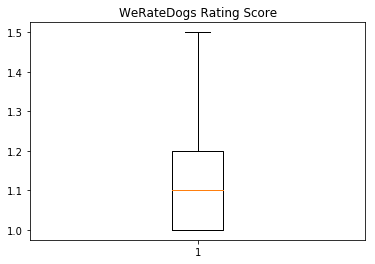

In [77]:
plt.boxplot(df.rating_score);
plt.title('WeRateDogs Rating Score')
plt.show()

## Day of Week Interactions

In [78]:
days_number = [0, 1, 2, 3, 4, 5, 6]
days_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek = df.timestamp.apply(lambda x: x.dayofweek).replace(days_number, days_week)

In [79]:
days_number = [0, 1, 2, 3, 4, 5, 6]
days_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek = df.timestamp.apply(lambda x: x.dayofweek).replace(days_number, days_week)
week = df[['retweet_count', 'favourite_count']].merge(dayofweek, right_index=True, left_index=True)
week.rename(columns={'timestamp':'day'}, inplace=True)
week['day'] = pd.Categorical(week['day'], categories=days_week, ordered=True)

retweet_day_mean = week.groupby('day').retweet_count.mean().sort_index()
favourite_day_mean = week.groupby('day').favourite_count.mean().sort_index()

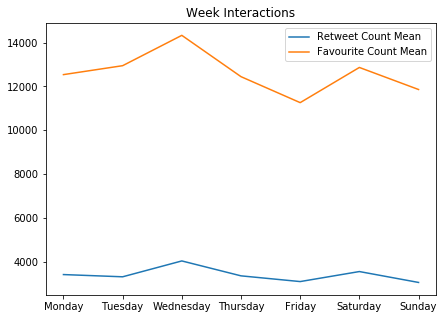

In [80]:
plt.figure(figsize=(7, 5))
plt.plot(retweet_day_mean.index, retweet_day_mean.values, label='Retweet Count Mean');
plt.plot(favourite_day_mean.index, favourite_day_mean.values, label='Favourite Count Mean')
plt.title('Week Interactions')
plt.legend()
plt.show()

Another way to show this is to have a bar plot, although line plot might show the case better.

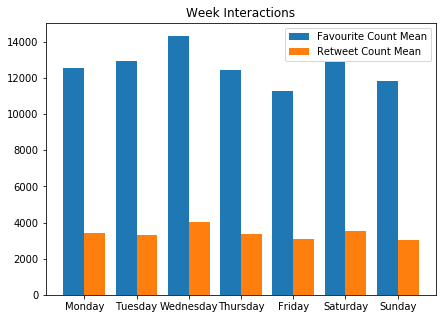

In [81]:
xpos = np.arange(len(retweet_day_mean))
plt.figure(figsize=(7, 5))
plt.xticks(xpos, favourite_day_mean.index)
plt.bar(xpos - 0.2, favourite_day_mean.values, width=0.4, label='Favourite Count Mean')
plt.bar(xpos + 0.2, retweet_day_mean.values, width=0.4, label='Retweet Count Mean')
plt.title('Week Interactions')
plt.legend()
plt.show()

Graph shows that interactions are at their highest on Wednesdays and Saturdays. Also, it shows that Favourite Count is always higher than Retweet Count.

## Breeds Interactions

There is over 100 breeds, so in order to make that convenient, we will be looking at the highest 15 breeds in terms of users' interactions.

### Retweet Interactions

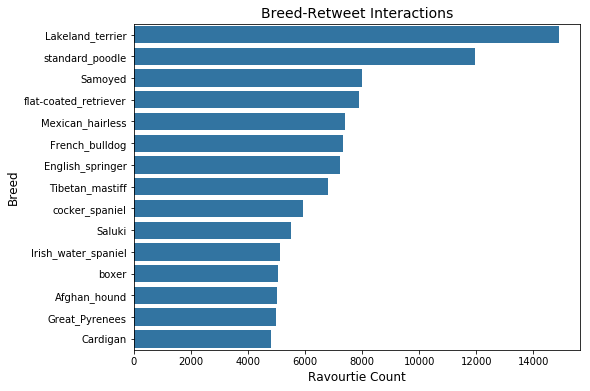

In [82]:
breed_retweet_count_mean = df.groupby('breed').retweet_count.mean().dropna()\
                                                          .sort_values(ascending=False).head(15)
color = sns.color_palette()[0]
plt.figure(figsize=(8, 6))
sns.barplot(breed_retweet_count_mean.values, breed_retweet_count_mean.index, color=color)
plt.title('Breed-Retweet Interactions', size=14)
plt.xlabel('Ravourtie Count', size=12)
plt.ylabel('Breed', size=12)
plt.show()

### Favourite Interactions

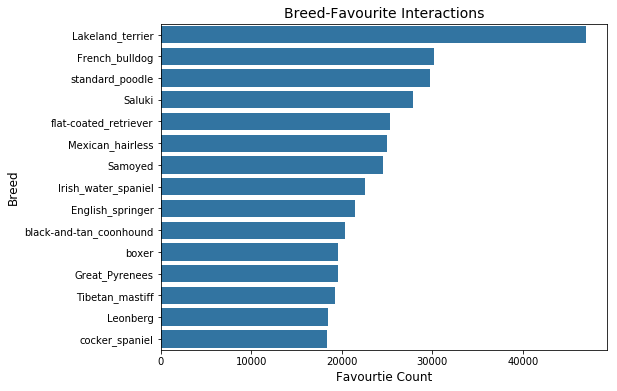

In [83]:
breed_favourite_count_mean = df.groupby('breed').favourite_count.mean().dropna()\
                                                            .sort_values(ascending=False).head(15)
color = sns.color_palette()[0]
plt.figure(figsize=(8, 6))
sns.barplot(breed_favourite_count_mean.values, breed_favourite_count_mean.index, color=color)
plt.title('Breed-Favourite Interactions', size=14)
plt.xlabel('Favourtie Count', size=12)
plt.ylabel('Breed', size=12)
plt.show()

## Distributions

### Tweets - Days

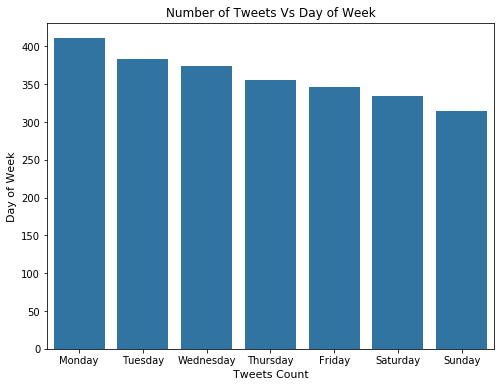

In [84]:
color = sns.color_palette()[0]
plt.figure(figsize=(8, 6))
sns.countplot(data=week, x='day', color=color)
plt.title('Number of Tweets Vs Day of Week', size=12)
plt.xlabel('Tweets Count', size=11)
plt.ylabel('Day of Week', size=11)
plt.show()

### Scoring Rate

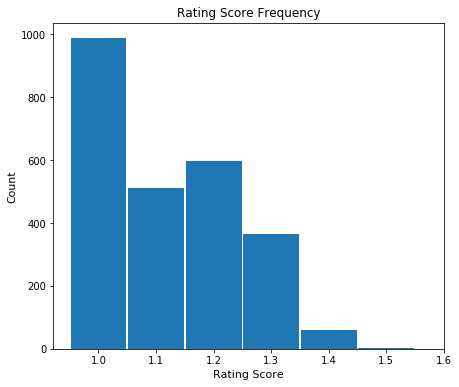

In [85]:
bins = np.arange(1, 1.6, 0.1) - 0.05
plt.figure(figsize=(7, 6))
plt.hist(df.rating_score, bins=bins, rwidth=0.97)
plt.xticks(np.arange(1, 1.6, 0.1))
plt.title('Rating Score Frequency', size=12)
plt.ylabel('Count', size=11)
plt.xlabel('Rating Score', size=11)
plt.show()